# <font color=darkred><center>DISCÍPULOS DE HEMERA <br>
### <font color=black><center>Enzo Januzzi, Joana Molinete, Rômulo Rabelo<br>
 <font color=black><center>*Faça-se luz!*

Em uma viagem pelo reino de Lumi, nossos heróis não imaginavam encontrar a mais épica de suas batalhas. Estavam cruzando o condado de Sirium, tentando agilizar seu longo percurso viajando pela noite. De repente, a bela noite iluminada pelas estrelas, lua e luzes distantes dos vilarejos se apaga, deixando o mundo num total breu. Os guerreiros sem entender, logo acendem tochas, e começam a procurar por informações, se abrigando em vilarejos próximos e interrogando os moradores das vilas que passavam pelo tortuoso caminho. A cada milha que percorriam, o ambiente ficava mais pesado, como se houvesse uma tensão no ar. Os aventureiros sentiam em seu âmago que estavam se aproximando de algo poderoso. Chegaram então, ao que poderia ser o destino final de suas vidas, uma caverna que parecia sugar toda a realidade a sua volta. As paredes de pedra pareicam pulsar e emitir um tipo de brilho sombrio. Ao adentrarem a caverna, encontraram um terrível e gigantesco dragão com escamas fluorescentes, que iludiam os olhos de quem quer que as observasse. O dragão parecia literalmente se alimentar da energia presente no ambiente. Agora, é dever do grupo destemido derrotar o dragão, e impedir que todos os recursos energéticos, naturais ou artificiais, sejam roubados do reino, melhorando aos poucos a economia e habitação da maravilhosa Lumi.

## TRABALHO FINAL - APRESENTAÇÃO DAS PROBLEMÁTICAS:

**Autores:** Discípulos de Hemera 

* Enzo Januzzi - Rhaegar Kamoris
* Joana Molinete - Mantis pennata
* Rômulo Rabelo - Zeriel Héosforo

## INTRODUÇÃO:

Com o projeto final da disciplina de Aprendizado de Máquina, nós, autores dos presentes notebooks, exploramos a aplicação de algumas técnicas de machine learning para prever a temperatura crítica de supercondutores usando um conjunto de dados intitulado “Superconductivity Data”[1]. A supercondutividade é uma área de grande interesse dos alunos, devido ao potencial dos materiais supercondutores em aplicações em grande parte dos escopos científicos e analíticos. Aplicamos algoritmos como Árvore de Decisões, Regressor K-NN e Support Vector Machine (Regressor) para identificar o modelo mais eficaz, comparando seus desempenhos na previsão de um valor crucial para o desempenho de supercondutores, a temperatura crítica, e utilizando o Root Mean Squared Error (RMSE) como principal métrica de comparação.

O desenvolvimento de materiais supercondutores de alta performance, essenciais para avanços tecnológicos em transmissão de energia e eletrônica de alta eficiência, tem incentivado a aplicação de aprendizado de máquina na ciência dos materiais. Supercondutores são materiais que apresentam uma propriedade única: a condução de eletricidade sem resistência quando submetidos a temperaturas abaixo de um valor crítico. No entanto, prever essa temperatura crítica é um desafio complexo, dada a quantidade de variáveis envolvidas.

O presente trabalho busca explorar o potencial do aprendizado de máquina para estimar a temperatura crítica de supercondutores, utilizando o conjunto de dados “Superconductivity Data”[1] do UCI Machine Learning Repository. O objetivo é analisar características estruturais e químicas que influenciam a supercondutividade e construir um modelo que auxilie na previsão dessa propriedade crucial. A abordagem utilizada baseia-se na identificação de padrões em atributos complexos e na seleção de algoritmos de aprendizado supervisionado, buscando contribuir para a otimização de novos materiais supercondutores.

Esta análise representa um avanço para a ciência dos materiais ao oferecer ferramentas preditivas que podem acelerar o desenvolvimento de supercondutores eficientes, para aplicações tecnológicas sustentáveis e inovadoras.

### Preparando o terreno:

Vamos começar importando as bibliotecas necessárias para a execução dos códigos. Aqui, utilizamos as bibliotecas `pandas` e `os` para a modificação do dataset em dataframe, a biblioteca `numpy` para tarefas de treino e teste dos modelos, e matplotlib para plotagem e observação analítica dos dados em gráficos.

In [66]:
import os as os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from optuna import create_study
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px

Muito bem! Agora, precisamos do dataset de base para nossos estudos. Como dito antes, o utilizado vai ser “Superconductivity Data” do site UCI, importando-o para o notebook atual como um dataframe. O dataset apresenta vários atributos de um supercondutor, tais como o número de elementos presente, a massa atômica média, a entropia de valência, entre outros, e a propriedade a ser predita (chamada de alvo ou target) é a temperatura crítica

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Romulo177/PF-Machine-Learning/refs/heads/main/dataset/supercondutividade_dados.csv")
df = df.dropna()
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


Por motivos de separação de variáveis, vamos criar outro dataframe, usando o mesmo dataset, para que possamos especificar os dados utilizados. A lógica vai ficar clara na parte de treinamento dos modelos.

In [4]:
df_vif = pd.read_csv("https://raw.githubusercontent.com/Romulo177/PF-Machine-Learning/refs/heads/main/dataset/supercondutividade_dados.csv")
df_vif = df_vif.dropna()
df_vif

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


### Seleção de atributos:

Vamos utilizar para a seleção de atributos o VIF (Variance Inflation Factor) que é uma medida de multicolinearidade entre variáveis independentes em uma regressão, o que nos ajuda a identificar se algumas variáveis tem colinearidade entre si, permitindo que retiremos da jogada as que possuem maior colinearidade, deixando então só as que de fato mais importam, pois elas mantém a maior parte das informações que podem explicar as que foram descartadas. Para calcular o VIF de uma variável, precisamos ajustar uma regressão linear onde essa variável é a variável dependente e as demais são preditoras, calculamos então o R² dessa regressão, que é utilizado para medir a proporção da variância de uma variável preditora a qual pode ser explicada por outras variáveis no modelo de regressão linear. O VIF é determinado por:

$$
VIF = \frac{1}{1 - R^2},
$$

Ao fazermos essa conta para todas as variáveis, podemos determinar as com maior colinearidade, e descartá-las.

In [ ]:
def selecao_vif(df_atributos, limiar_vif): # o valor "limiar_vif" pode ser 5 ou 10, se for 10 é mais relaxado e se for 5 é mais rigoroso

    df_vif = df_atributos.copy()

    while True:
        VIFs = []

        for col in df_vif.columns:
            X = df_vif.drop(col, axis=1).values
            y = df_vif[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df_vif.columns[indice]
            df_vif = df_vif.drop(coluna_remocao, axis=1)

        else:
            break
            

    return df_vif

df_vif = selecao_vif(df, 5)
df_vif

,mean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,wtd_entropy_Density,range_Density,wtd_gmean_ElectronAffinity,...,gmean_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,gmean_Valence,range_Valence,critical_temp
0,88.944468,31.794921,51.968828,718.152900,735.985714,160.250000,42.914286,0.814598,8958.571,99.414682,...,3.479475,12.878,1.744571,107.756645,0.621979,0.308148,57.127669,2.213364,1,29.00
1,92.729214,36.161939,47.094633,720.605511,743.164286,161.200000,50.571429,0.914802,10488.571,101.166398,...,4.403790,12.878,1.595714,172.205316,0.619735,0.847404,51.413383,1.888175,2,26.00
2,88.944468,35.741099,51.968828,718.152900,743.164286,160.250000,49.314286,0.760305,8958.571,101.082152,...,3.479475,12.878,1.757143,107.756645,0.619095,0.308148,57.127669,2.213364,1,19.00
3,88.944468,33.768010,51.968828,718.152900,739.575000,160.250000,46.114286,0.788889,8958.571,100.244950,...,3.479475,12.878,1.744571,107.756645,0.620535,0.308148,57.127669,2.213364,1,22.00
4,88.944468,27.848743,51.968828,718.152900,728.807143,160.250000,36.514286,0.859811,8958.571,97.774719,...,3.479475,12.878,1.744571,107.756645,0.624878,0.308148,57.127669,2.213364,1,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,106.957877,15.504479,65.764081,651.611213,427.546667,176.500000,57.808889,1.110551,7511.000,61.057784,...,22.494622,36.400,27.497778,65.500000,95.001493,1.029002,83.048889,3.223710,1,2.44
21259,92.266740,7.353333,69.232655,702.115184,659.771429,159.200000,20.285714,1.080432,11848.571,60.814837,...,3.839585,12.878,2.378952,132.805316,1.577047,0.949904,76.176553,2.168944,1,122.10
21260,99.663190,53.041104,6.756810,730.207231,370.180000,183.500000,124.600000,0.572700,3453.000,79.871364,...,21.155614,10.100,18.100000,62.500000,57.038314,0.683870,29.000000,4.472136,1,1.98
21261,99.663190,31.115202,6.756810,730.207231,208.799000,183.500000,84.230000,0.667210,3453.000,75.915236,...,21.155614,10.100,13.315000,62.500000,58.781651,0.683870,15.250000,4.472136,1,1.84


A lista com as colunas restantes pode ser encontrada abaixo

In [ ]:
list(df.columns.values)

['number_of_elements',
 'mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'wtd_mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'wtd_entropy_fie',
 'range_fie',
 'wtd_range_fie',
 'std_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'gmean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'wtd_range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'mean_Density',
 'wtd_mean_Density',
 'gmean_Density',
 'wtd_gmean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_range_Density',
 'std_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'gmean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'entropy_E

### Métrica de erro:

Como a métrica de erro vai ser comum para todos os algoritmos utilizados, podemos definir uma função para ela logo, e apenas utilizá-la quando for necessário.

In [7]:
def calcula_RMSE(y_teste, y_previsto):
    """O RMSE (Root Mean Squared Error) é usada para avaliar a precisão de modelos preditivos, ele funciona medindo a média 
    das diferenças quadráticas entre os valores previstos pelo modelo e os valores reais, indicando quanto o modelo se aproximou
    dos valores corretos."""

    RMSE = mean_squared_error(y_teste, y_previsto, squared=False)

    return RMSE

### Split de treino e teste:

Da mesma forma que a métrica de comparação, a divisão dos dados entre treino e teste também precisa ser igual, para que tenhamos uma distribuição justa entre todos os modelos. Além disso, a semente aleatória é um hiperparâmetro, que deve ser definido antes do treinamento do modelo e o mesmo para todos os algoritmos pois influencia os resultados. Embora a semente não seja ajustada diretamente para melhorar a precisão ou reduzir o erro do modelo, ela controla os processos aleatórios, e garante a reprodutibilidade dos resultados. Vamos fazer dois tipos de split, um utilizando as features VIF e o outro não.

#### Utilizando o VIF:

In [8]:
seed = 42

FEATURES_VIF = ['mean_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_range_fie',
 'mean_atomic_radius',
 'wtd_range_atomic_radius',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'gmean_FusionHeat',
 'range_FusionHeat',
 'wtd_range_FusionHeat',
 'mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'entropy_ThermalConductivity',
 'wtd_range_ThermalConductivity',
 'gmean_Valence',
 'range_Valence'
 ]

TARGET_VIF = ['critical_temp']

indices = df_vif.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=0.2, random_state=seed
)
"""definimos que durante o treino o modelo vai ter acesso a 80% dos dados, enquanto no teste ele vai ter acesso aos 20% 
   dos dados que ainda não conhecia, tentando prever os targets"""

df_treino_vif = df_vif.loc[indices_treino]
df_teste_vif = df_vif.loc[indices_teste]

X_treino_vif = df_treino_vif.reindex(FEATURES_VIF, axis=1).values
y_treino_vif = df_treino_vif.reindex(TARGET_VIF, axis=1).values.ravel()

X_teste_vif = df_teste_vif.reindex(FEATURES_VIF, axis=1).values
y_teste_vif = df_teste_vif.reindex(TARGET_VIF, axis=1).values.ravel() 

scaler = StandardScaler()
X_treino_vif = scaler.fit_transform(X_treino_vif)
X_teste_vif = scaler.transform(X_teste_vif)

#### Sem o VIF:

In [9]:
FEATURES = ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 
             'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 
             'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 
             'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 
             'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 
             'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 
             'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 
             'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 
             'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 
             'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 
             'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 
             'range_ElectronAffinity', 'wtd_range_ElectronAffinity', 'std_ElectronAffinity', 
             'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat', 'gmean_FusionHeat', 
             'wtd_gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat', 
             'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat', 'mean_ThermalConductivity', 
             'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 
             'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity', 
             'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 
             'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 
             'wtd_entropy_Valence', 'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']

TARGET = ['critical_temp']

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=0.2, random_state=seed
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

## METODOLOGIA:

### Árvore de decisões:
A árvore de decisão é um algoritmo de regressão implementado com a biblioteca `scikit-learn` que cria uma estrutura de ramificação baseada em perguntas sobre os dados, que os divide em subconjuntos cada vez menores até chegar a uma decisão final.

O processo funciona assim: a árvore começa com todos os dados e os divide, em cada nó, pela métrica que mais minimiza o erro (no caso de regressão), onde cada divisão cria novos nós (ou folhas, quando não há mais subdivisões), com cada um representando um valor predito final.

Aqui, vamos treinar um modelo de Árvore de Decisão utilizando a seleção de atributos VIF feita anteriormente, comparando a métrica RMSE do o mesmo modelo sem a utilização dos dados do VIF. Para isso, foi feito o uso de pipeline, otimização de hiperparâmetros com o Optuna

O `pipeline` vai ser utilizado em todos os treinamentos de modelos. Utilizaremos essa estratégia pois ela facilita a execução de várias etapas de pré-processamento e modelagem em sequência, permitindo que padronizemos o fluxo de trabalho, aplicando transformações de dados e treinando modelos de forma integrada e eficiente, sem repetições desnecessárias. Para começar, vamos aplicar o escalonamento dos dados com o `StandardScaler()` da biblioteca `Scikit-learn` antes de ajustar o modelo `DecisionTreeRegressor`, padronizando todas as entradas antes de entrar no modelo final.

In [10]:
modelo_ad_vif_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state = seed),
)

Para rodar o código, vamos usar `cross_val_score` para avaliar o desempenho do pipeline nos dados de treinamento X_treino_vif e y_treino_vif, utilizando validação cruzada. O parâmetro `NUM_FOLDS` define 10 divisões para a validação cruzada, onde o modelo é treinado e avaliado 10 vezes.

In [11]:
NUM_FOLDS = 10

metricas_vif = cross_val_score(
    modelo_ad_vif_pipeline,
    X_treino_vif,
    y_treino_vif,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

rmse_vif = abs(metricas_vif.mean())
               
print("As métricas foram:", metricas_vif)
print()
print("A média das métricas (RMSE) é de:", rmse_vif)

As métricas foram: [-13.09458455 -13.67626153 -12.62711652 -12.97862441 -11.59509328
 -13.75613647 -13.34549503 -13.37019051 -12.60972034 -11.68540768]

A média das métricas (RMSE) é de: 12.873863031857223


Agora, vamos treinar um modelo de Árvore de Decisão sem utilizar a seleção de atributos VIF feita anteriormente, para ver qual dos dois se sai melhor.

In [12]:
modelo_ad_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=seed),
)

In [13]:
metricas = cross_val_score(
    modelo_ad_pipeline,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

rmse = abs(metricas.mean())
print("As métricas foram:", metricas)
print()
print("O Root Mean Squared Error (RMSE) sem vif é de:", rmse)

As métricas foram: [-13.17115228 -12.48331499 -11.62103778 -12.01059495 -11.84613957
 -12.24381509 -12.56880523 -12.56510838 -12.19131572 -11.05284969]

O Root Mean Squared Error (RMSE) sem vif é de: 12.175413366174228


Mas porque o RMSE sem a utilização das "melhores" features foi menor do que o com as features selecionadas pelo VIF? Provavelmente nesse caso, o VIF acabou retornando features que tinham baixa colinearidade entre as outras, mas que também não eram tão relevantes para a previsão dos dados como um todo.

Vamos observar um gráfico que ilustra bem a pequena diferença entre os desempenhos do algoritmo, usando os dados com seleção de atributos e os dados com todos os atributos:

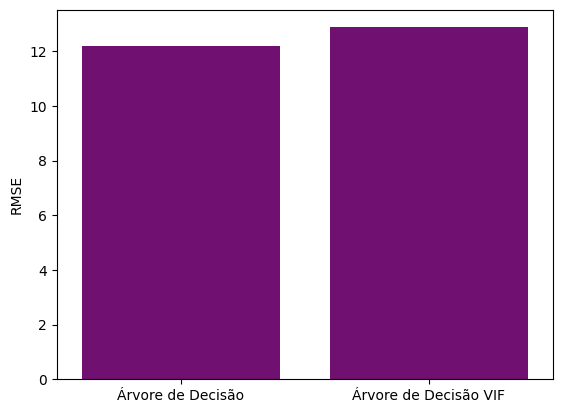

In [14]:
eixo = sns.barplot(x = ['Árvore de Decisão','Árvore de Decisão VIF'], y = [rmse, rmse_vif], color = 'purple')
eixo.set_ylabel("RMSE");

### Otimização com Optuna:

`Optuna` é uma biblioteca de otimização de hiperparâmetros que permite encontrar as melhores combinações para algoritmos de machine learning. O processo de otimização começa com a criação de uma função objetivo que define os hiperparâmetros a serem otimizados e o modelo que será treinado. Durante o treinamento, o `Optuna` usa algoritmos de busca para explorar o espaço de hiperparâmetros de forma eficiente.

Vamos definir uma função chamada cria_instancia_modelo(trial), que vai usar o `Optuna` para sugerir valores ideais para os hiperparâmetros de um modelo DecisionTreeRegressor.

In [15]:
def cria_instancia_modelo_ad(trial):
    
    parametros_ad = {
        "criterion": trial.suggest_categorical(
            "criterion", ["squared_error", "friedman_mse", "poisson"]
        ),
        "min_samples_split": trial.suggest_int(
            "min_samples_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_samples_leaf", 1, 20, log=True
        ),
        "max_depth": trial.suggest_int("max_depth", 1, 42),
        "random_state": seed,
    }

    modelo = DecisionTreeRegressor(**parametros_ad)

    return modelo

Criando um objeto de estudo com o `Optuna`, podemos armazenar os resultados e reutilizá-los depois, além de que o objeto será usado para otimizar o modelo.

In [16]:
from optuna import create_study

NOME_DO_ESTUDO = "arvore_decisao_supercondutores"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-28 07:14:29,784] A new study created in RDB with name: arvore_decisao_supercondutores


Aqui, a função objetivo_ad define o objetivo da otimização no `Optuna`. Ela instancia nosso modelo com hiperparâmetros sugeridos no trial, realiza a avaliação do modelo usando validação cruzada e retorna a média negativa dos RMSEs, já que o `Optuna` busca minimizar o valor retornado pela função, pois quanto menor o RMSE melhor o modelo.

In [17]:
def funcao_objetivo_ad(trial, X, y, num_folds):

    modelo = cria_instancia_modelo_ad(trial)

    metricas_ad = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    return -metricas_ad.mean()

A função objetivo parcial está sendo criada para gerar uma função simplificada que o `Optuna` pode usar ao realizar o ajuste de hiperparâmetros, onde o número de folds é a quantidade de vezes que a validação cruzada será realizada, e usa a função objetivo original com os parâmetros X_treino, y_treino e NUM_FOLDS já preenchidos, deixando apenas trial como argumento, como o `Optuna` exige.

In [18]:
NUM_FOLDS = 10
# precisamos de uma função que tenha apenas um argumento: o trial

def funcao_objetivo_parcial_ad(trial):
    return funcao_objetivo_ad(trial, X_treino, y_treino, NUM_FOLDS)

Utilizando as funções definidas, podemos otimizar o modelo.

In [19]:
NUM_TENTATIVAS = 10

objeto_de_estudo.optimize(funcao_objetivo_parcial_ad, n_trials=NUM_TENTATIVAS)

df_optimizado = objeto_de_estudo.trials_dataframe()

df_optimizado

[I 2024-10-28 07:14:51,285] Trial 0 finished with value: 13.21396202142412 and parameters: {'criterion': 'friedman_mse', 'min_samples_split': 2, 'min_samples_leaf': 16, 'max_depth': 9}. Best is trial 0 with value: 13.21396202142412.
[I 2024-10-28 07:15:19,621] Trial 1 finished with value: 11.823880198387773 and parameters: {'criterion': 'friedman_mse', 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 29}. Best is trial 1 with value: 11.823880198387773.
[I 2024-10-28 07:15:32,976] Trial 2 finished with value: 16.2313916045576 and parameters: {'criterion': 'poisson', 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 6}. Best is trial 1 with value: 11.823880198387773.
[I 2024-10-28 07:15:55,791] Trial 3 finished with value: 12.071408032846975 and parameters: {'criterion': 'squared_error', 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_depth': 28}. Best is trial 1 with value: 11.823880198387773.
[I 2024-10-28 07:16:26,757] Trial 4 finished with value: 11.96306134

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_max_depth,params_min_samples_leaf,params_min_samples_split,state
0,0,13.213962,2024-10-28 07:14:29.913527,2024-10-28 07:14:51.251378,0 days 00:00:21.337851,friedman_mse,9,16,2,COMPLETE
1,1,11.823880,2024-10-28 07:14:51.299770,2024-10-28 07:15:19.603963,0 days 00:00:28.304193,friedman_mse,29,5,3,COMPLETE
2,2,16.231392,2024-10-28 07:15:19.635983,2024-10-28 07:15:32.950537,0 days 00:00:13.314554,poisson,6,7,2,COMPLETE
3,3,12.071408,2024-10-28 07:15:32.993090,2024-10-28 07:15:55.774381,0 days 00:00:22.781291,squared_error,28,17,3,COMPLETE
4,4,11.963061,2024-10-28 07:15:55.802420,2024-10-28 07:16:26.711419,0 days 00:00:30.908999,squared_error,33,2,9,COMPLETE
5,5,11.863822,2024-10-28 07:16:26.757056,2024-10-28 07:16:57.306525,0 days 00:00:30.549469,poisson,22,3,10,COMPLETE
6,6,23.542435,2024-10-28 07:16:57.340563,2024-10-28 07:16:59.758024,0 days 00:00:02.417461,squared_error,1,1,7,COMPLETE
7,7,23.542435,2024-10-28 07:16:59.813992,2024-10-28 07:17:02.353739,0 days 00:00:02.539747,poisson,1,2,13,COMPLETE
8,8,17.333374,2024-10-28 07:17:02.390610,2024-10-28 07:17:13.617909,0 days 00:00:11.227299,poisson,5,1,3,COMPLETE
9,9,11.989422,2024-10-28 07:17:13.672811,2024-10-28 07:17:38.990073,0 days 00:00:25.317262,poisson,14,7,4,COMPLETE


Neste trecho de código, acessamos o melhor resultado do estudo realizado com o `Optuna`.

In [20]:
melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

Número do melhor trial: 1
Parâmetros do melhor trial: {'criterion': 'friedman_mse', 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 29}


Agora, instanciamos o modelo com os hiperparâmetros encontrados.

In [21]:
modelo = cria_instancia_modelo_ad(melhor_trial)
modelo.fit(X_treino, y_treino)

y_previsto = modelo.predict(X_teste)

Vamos então criar um pipeline para o presente modelo de aprendizado de máquina. O make_pipeline combina duas etapas: StandardScaler() que normaliza os dados, ajustando a média para 0 e o desvio padrão para 1, e DecisionTreeRegressor que cria um regressor de árvore de decisão com os hiperparâmetros que resultaram no melhor desempenho, obtidos do melhor trial do Optuna.

In [22]:
modelo_ad_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=seed, **melhor_trial.params),
)

Por fim, treinamos nosso modelo e o testamos:

In [24]:
modelo_ad_pipeline.fit(X_treino, y_treino)

modelo_ad_pipeline.fit(X_treino, y_treino)

y_previsto = modelo_ad_pipeline.predict(X_teste)

RMSE_ad = calcula_RMSE(y_teste, y_previsto)
print(RMSE_ad)

11.108717992651462


### K-NN vizinhos:

Além da análise e implementação pelo modelo da Árvore de Decisão, adotaremos outro conhecido modelo para análise e comparação: os k-NN vizinhos.

O k-NN-vizinhos é outro algoritmo de regressão que pode ser implemetado com a biblioteca scikit-learn e basicamente consiste em tirar conclusões (previsão) de um dado a partir de outros dados vizinhos a ele utilizando as distâncias entre esses dados para achar os vizinhos.

O processo para implementação é muito simples, o que é uma grande vantagem do modelo, consistindo em basicamente analisar a distância dos dados para chegar nos k vizinhos mais próximos, com k sendo a quantidade de vizinhos, e retira a média desses vizinhos para utilizar como previsão do novo valor

No nosso caso, vamos utilizar o modelo de k-NN vizinhos aplicado aos dados já normalizados (parte essencial na implementação do algoritmo), obtendo a métrica do RMSE para análise do desempenho do modelo após optimização dos hiperparâmetros pelo Optuna. Além disso, foi utilizada a técnica de pipeline para facilitar em algumas das etapas de implementação.

O primeiro passo a ser feito é optimizar os hiperparâmetros para descobrir como obter o melhor desempenho possível, como pode ser visto abaixo:

In [25]:
modelo_knn_vif_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(),
)

In [26]:
metricas_knn_vif = cross_val_score(
    modelo_knn_vif_pipeline,
    X_treino_vif,
    y_treino_vif,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

rmse = abs(metricas_knn_vif.mean())
print("As métricas foram:", metricas_knn_vif)
print()
print("O Root Mean Squared Error (RMSE) com vif é de:", rmse)

c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


As métricas foram: [-11.70943973 -10.87668594 -10.5538402  -11.08500519 -10.37919229
 -11.45188173 -12.10544107 -10.67512621 -11.07663449 -11.12831602]

O Root Mean Squared Error (RMSE) com vif é de: 11.104156287432467


In [27]:
modelo_knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(),
)

In [28]:
metricas_knn = cross_val_score(
    modelo_knn_pipeline,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

rmse = abs(metricas_knn.mean())
print("As métricas foram:", metricas_knn)
print()
print("O Root Mean Squared Error (RMSE) sem vif é de:", rmse)

As métricas foram: [-11.62550323 -10.74414097 -10.56623661 -11.13663181 -10.06989875
 -11.35274831 -12.1677312  -10.87776335 -11.05399638 -11.09709064]

O Root Mean Squared Error (RMSE) sem vif é de: 11.06917412429298


Vamos começar instanciando nosso modelo, separando os valores de hiperparâmetros que queremos testar.

In [29]:
NUM_FOLDS = 7

def cria_instancia_modelo_KNN(trial):
    parametros_knn = {
        "n_neighbors": trial.suggest_int("n_neighbors", low=3, high=9), 
        "p": trial.suggest_int("p", low=1, high=2)  
    }
    
    modelo = KNeighborsRegressor(**parametros_knn, n_jobs=1)
    return modelo

In [30]:
def funcao_objetivo_knn(trial):
    modelo = cria_instancia_modelo_KNN(trial)
    
    metricas_knn_optuna = cross_val_score(
        modelo,
        X_treino,  
        y_treino, 
        cv=NUM_FOLDS
    )
    
    return metricas_knn_optuna.mean() 

Para realizar os testes com o `optuna` e descobrir os melhores hiperparâmetros foi criado um estudo:

In [31]:
NOME_DO_ESTUDO = "optuna_knn"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-28 07:18:48,539] A new study created in RDB with name: optuna_knn


Após conhecer os melhores hiperparâmetros, foram feitas previsões para diferentes quantidades de vizinhos e diferentes cálculos de distância, obtendo os valores de RMSE referentes a cada um:

In [32]:
NUM_TENTATIVAS = 5

objeto_de_estudo.optimize(funcao_objetivo_knn, n_trials=NUM_TENTATIVAS)

df = objeto_de_estudo.trials_dataframe()
df

[I 2024-10-28 07:18:54,120] Trial 0 finished with value: 0.8968350035033558 and parameters: {'n_neighbors': 6, 'p': 1}. Best is trial 0 with value: 0.8968350035033558.
[I 2024-10-28 07:18:55,119] Trial 1 finished with value: 0.8939306926592504 and parameters: {'n_neighbors': 5, 'p': 2}. Best is trial 1 with value: 0.8939306926592504.
[I 2024-10-28 07:18:55,980] Trial 2 finished with value: 0.8939306926592504 and parameters: {'n_neighbors': 5, 'p': 2}. Best is trial 1 with value: 0.8939306926592504.
[I 2024-10-28 07:18:56,759] Trial 3 finished with value: 0.8939306926592504 and parameters: {'n_neighbors': 5, 'p': 2}. Best is trial 1 with value: 0.8939306926592504.
[I 2024-10-28 07:18:57,566] Trial 4 finished with value: 0.9007820888346343 and parameters: {'n_neighbors': 3, 'p': 2}. Best is trial 1 with value: 0.8939306926592504.


,number,value,datetime_start,datetime_complete,duration,params_n_neighbors,params_p,state
0,0,0.896835,2024-10-28 07:18:51.677078,2024-10-28 07:18:54.070019,0 days 00:00:02.392941,6,1,COMPLETE
1,1,0.893931,2024-10-28 07:18:54.137012,2024-10-28 07:18:55.094548,0 days 00:00:00.957536,5,2,COMPLETE
2,2,0.893931,2024-10-28 07:18:55.119792,2024-10-28 07:18:55.937087,0 days 00:00:00.817295,5,2,COMPLETE
3,3,0.893931,2024-10-28 07:18:55.987511,2024-10-28 07:18:56.707913,0 days 00:00:00.720402,5,2,COMPLETE
4,4,0.900782,2024-10-28 07:18:56.759075,2024-10-28 07:18:57.527481,0 days 00:00:00.768406,3,2,COMPLETE


Analisando esse resultado, pode-se ver um melhor desempenho para os cálculos baseados na distância Manhattan e para menores valores de vizinhos, como era imaginado.

In [33]:
melhores_parametros_knn = objeto_de_estudo.best_trial

modelo_knn_optuna_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(**melhores_parametros_knn.params)
)

In [35]:
modelo_knn_optuna_pipeline.fit(X_treino, y_treino)

y_previsto_knn = modelo_knn_optuna_pipeline.predict(X_teste)

RMSE_knn = calcula_RMSE(y_teste, y_previsto_knn)
print(RMSE_knn)

10.449589083190505


A seguir, definimos "resultados_knn" apenas para que pudéssemos plotar um gráfico visualmente agradável.

In [36]:
metricas = [1,2]
numero_vizinhos = [3,5,7,9]
resultados_knn = pd.DataFrame({'RMSE': [],'Número de Vizinhos' : [], 'Distância' : []})

for j in metricas:
    for i in numero_vizinhos:

        modelo_knn = KNeighborsRegressor(n_neighbors=i, p=j)
        modelo_knn.fit(X_treino, y_treino)
        y_previsto = modelo_knn.predict(X_teste)
        RMSE = calcula_RMSE(y_teste, y_previsto)
        
        nova_linha = pd.DataFrame({'RMSE': [RMSE], 'Número de Vizinhos': [i], 'Distância': [j]})
        
        resultados_knn = pd.concat([resultados_knn, nova_linha], ignore_index=True)
        
resultados_knn['Distância'] = resultados_knn['Distância'].replace({1: 'Manhattan', 2: 'Euclidiana'})

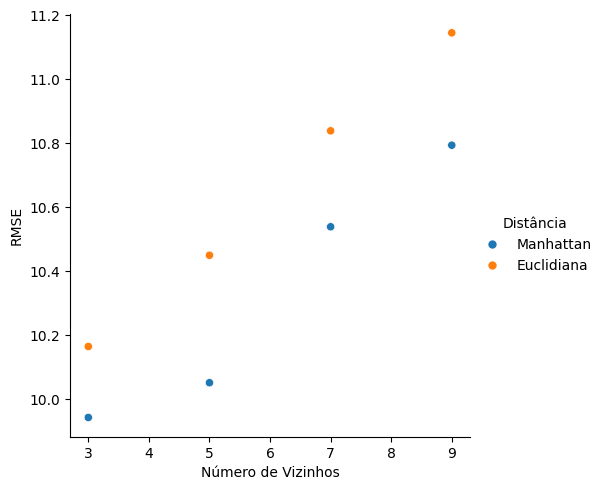

In [37]:
g = sns.relplot(
    data=resultados_knn,
    x="Número de Vizinhos", y="RMSE",
    hue="Distância",
)

É possível ver como os valores previstos se relacionam com os valores reais:

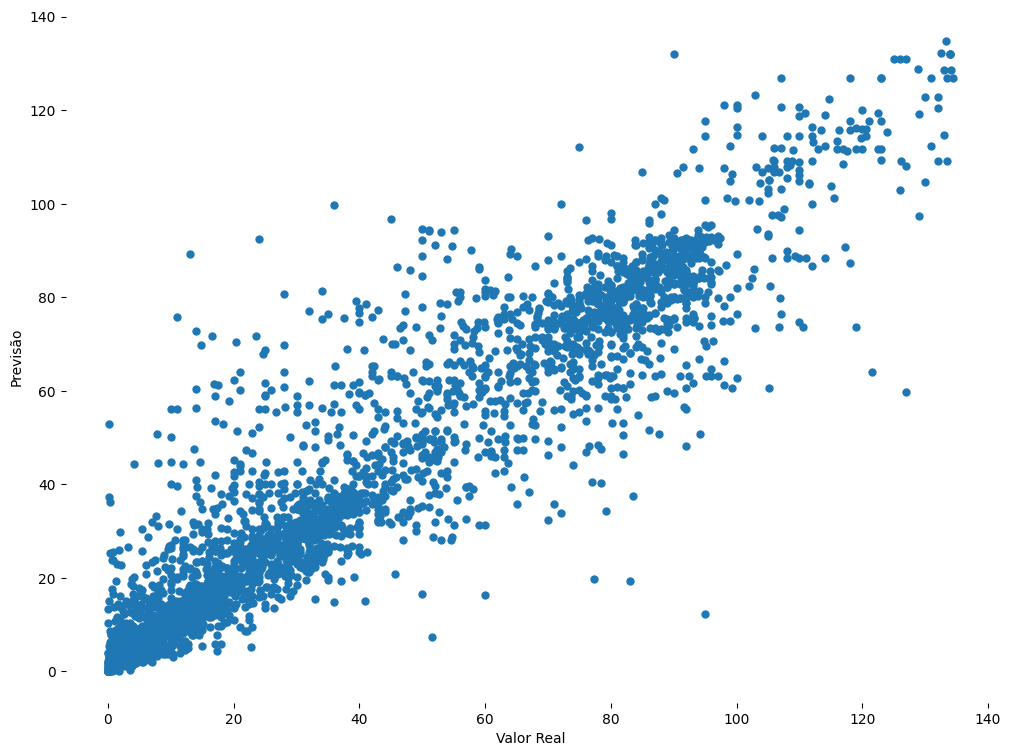

In [38]:
f, ax = plt.subplots(figsize=(12, 9)) 
sns.despine(fig=f, left=True, bottom=True) 
h = sns.scatterplot(x=y_teste, y=y_previsto_knn, linewidth=0, ax=ax)  
h.set_ylabel("Previsão")
h.set_xlabel("Valor Real")
plt.show()

### Support Vector Machine (Regressor):

Seguindo o que foi feito nos dois outros modelos, vamos para o nosso nº 3: o Support Vector Regressor.
O Support Vector Regressor, subdivisão do modelo Support Vector Machine, é um algoritmo utilizado para regressão que pode ser implementado a partir da biblioteca scikit-learn, consistindo em achar um "hiperplano" que melhor separa o dados.

Mas aí vem a pergunta... "Como que funciona esse processo?"

E nós respondemos... O Support Vector Regressor busca achar uma função que melhor se adeque aos calores dos dados, mas permitindo uma margem de erro - chamada de epsilon - que é analisada como "aceitável" em torno da previsão exata. Com isso em mente, o modelo busca não achar um valor exato, mas sim garantir que ele esteja dentro dessa margem epsilon e "punir" os valores que estão fora.  

Nesse notebook, iremos treinar um modelo de Support Vector Machine que irá utilizar a seleção de atributos VIF que fizemos mais para cima. Com isso, obtivemos uma previsão e calculamos a raiz do erro quadrático médio para analisar a eficiência.

Como anteriormente, vamos criar um `pipeline` para facilitar a implementação dos códigos. Esse é o algoritmo treinado usando a seleção de features VIF.

In [39]:
modelo_svr_vif_pipeline = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf',C= 1.0, epsilon=0.1)
)

In [40]:
metricas_svr_vif = cross_val_score(
    modelo_svr_vif_pipeline,
    X_treino_vif,
    y_treino_vif,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

rmse = abs(metricas_svr_vif.mean())
print("As métricas foram:", metricas_svr_vif)
print()
print("O Root Mean Squared Error (RMSE) com vif é de:", rmse)

As métricas foram: [-17.44056056 -16.91885772 -17.13875574 -16.79625163 -17.01795811
 -16.60337843 -16.74702897]

O Root Mean Squared Error (RMSE) com vif é de: 16.95182730831298


Agora, o algoritmo treinado sem utilizar a seleção de features VIF.

In [41]:
modelo_svr_pipeline = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf',C= 1.0, epsilon=0.1),
)

In [42]:
metricas_svr = cross_val_score(
    modelo_svr_pipeline,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

rmse = abs(metricas_svr.mean())
print("As métricas foram:", metricas_svr)
print()
print("O Root Mean Squared Error (RMSE) sem vif é de:", rmse)

As métricas foram: [-16.94968809 -16.54431582 -16.74257879 -16.37593469 -16.59190093
 -16.34960113 -16.21367435]

O Root Mean Squared Error (RMSE) sem vif é de: 16.538241970707407


Para o melhor funcionamento do modelo, foi feita uma otimização de hiperparâmetros usando a biblioteca `optuna` para buscar os melhores parâmetros para que o modelo obtenha o melhor desempenho possível. Como visto antes, começamos salvando um arquivo para armazenar os dados.

In [43]:
NOME_DO_ESTUDO = "svr_optuna_supercondutores"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-28 07:24:49,273] A new study created in RDB with name: svr_optuna_supercondutores


Instanciamos o modelo, dividimos os dados em treino e teste, e treinamos o modelo, como para os outros algoritmos.

In [44]:
def cria_instancia_modelo_svr(trial):
    
    parametros_svr = {
        "C": trial.suggest_float(
            "C", 0.1, 1.0
        ),
        "epsilon": trial.suggest_float(
            "epsilon", 0.01, 0.1
        ),
        "kernel": trial.suggest_categorical(
            "kernel", ['linear', 'poly', 'rbf', 'sigmoid']
        ),
    }

    modelo = SVR(**parametros_svr)

    return modelo


def funcao_objetivo_svr(trial, X, y, num_folds):

    modelo = cria_instancia_modelo_svr(trial)

    metricas_svr = cross_val_score(
        modelo,
        X,
        y,
        cv=num_folds,
    )

    return calcula_RMSE(y_teste, y_previsto)

In [45]:
NUM_FOLDS = 5
# precisamos de uma função que tenha apenas um argumento: o trial

def funcao_objetivo_parcial_svr(trial):
    return funcao_objetivo_svr(trial, X_treino, y_treino, NUM_FOLDS)

NUM_TENTATIVAS = 3

objeto_de_estudo.optimize(funcao_objetivo_parcial_svr, n_trials=NUM_TENTATIVAS)

df = objeto_de_estudo.trials_dataframe()

df

[I 2024-10-28 07:26:32,043] Trial 0 finished with value: 11.145586539873925 and parameters: {'C': 0.6447569830532149, 'epsilon': 0.02332374533139772, 'kernel': 'sigmoid'}. Best is trial 0 with value: 11.145586539873925.
[I 2024-10-28 07:27:54,891] Trial 1 finished with value: 11.145586539873925 and parameters: {'C': 0.2680493336905062, 'epsilon': 0.02489640378525203, 'kernel': 'linear'}. Best is trial 0 with value: 11.145586539873925.
[I 2024-10-28 07:29:49,445] Trial 2 finished with value: 11.145586539873925 and parameters: {'C': 0.5791762801647341, 'epsilon': 0.08726146429083373, 'kernel': 'rbf'}. Best is trial 0 with value: 11.145586539873925.


,number,value,datetime_start,datetime_complete,duration,params_C,params_epsilon,params_kernel,state
0,0,11.145587,2024-10-28 07:24:49.319832,2024-10-28 07:26:31.993092,0 days 00:01:42.673260,0.644757,0.023324,sigmoid,COMPLETE
1,1,11.145587,2024-10-28 07:26:32.060684,2024-10-28 07:27:54.849198,0 days 00:01:22.788514,0.268049,0.024896,linear,COMPLETE
2,2,11.145587,2024-10-28 07:27:54.904892,2024-10-28 07:29:49.406243,0 days 00:01:54.501351,0.579176,0.087261,rbf,COMPLETE


Com o melhor desempenho dos parâmetros obtido a partir do Optuna, começamos a previsão pelo modelo utilizando esses mesmos parâmetros e obtivemos um valor de RMSE referente a eficiência do SVR nos dados.

In [46]:
melhores_parametros_optuna_svr = objeto_de_estudo.best_trial

modelo_svr = SVR(
    C = melhores_parametros_optuna_svr.params['C'],
    epsilon = melhores_parametros_optuna_svr.params['epsilon'],
    kernel = melhores_parametros_optuna_svr.params['kernel'],
)

modelo_svr.fit(X_treino, y_treino)

y_previsto = modelo_svr.predict(X_teste)
RMSE = calcula_RMSE(y_teste, y_previsto)

print(
    f"O RMSE do modelo Support Vector Regressor usando os hiperparâmetros otimizados foi de {RMSE:.2f} unidades de y."
)

O RMSE do modelo Support Vector Regressor usando os hiperparâmetros otimizados foi de 90.50 unidades de y.


Como dito anteriormente, para esse modelo também será utilizada uma pipeline no intuito de facilitar algumas das etapas necessárias para o modelo.

In [47]:
modelo_svr_optuna_pipeline = make_pipeline(
    StandardScaler(),
    SVR(**melhores_parametros_optuna_svr.params)
)

In [51]:
modelo_svr_optuna_pipeline.fit(X_treino, y_treino)

y_previsto = modelo_svr_optuna_pipeline.predict(X_teste)

RMSE = calcula_RMSE(y_teste, y_previsto)
print(RMSE)

90.50145338991568


### **Comparação entre modelos**

A partir da utiização de diferentes modelos, há diferenças na sua eficiência pois cada modelo tem vantagens e desvantagens quando aplicada a um conjunto de dados:

### **`Vantagens`**:

***Árvore de Decisão:***
* Fácil visualização
* Normalização não é tão necessária quanto no k-NN

***k-NN vizinhos:***
* Modelo simples de implementar
* Não precisa de treinamento

***Support Vector Machine:***
* Bom para alto número de dados
* Se aplica a diferentes tipos de problema

### **`Desvantagens`**:

***Árvore de Decisão:***
* Propenso a overfitting dependendo dos dados
* Instável quanto a variações baixas de dados

***k-NN vizinhos:***
* Normalização é parte mais que essencial no processo
* Precisa de dados ajustados

***Support Vector Machine:***
* Demanda muito tempo e custo computacional para realizar todo o processo do modelo
* Difícil visualização e interpretação


Portanto, a partir das vantagens e desvantagens de cada modelo aplicado, podemos analisar a eficiência de cada um deles para aplicação proposta pelas suas métricas, como pode ser visto abaixo:

| Modelo   | RMSE     |
| ---   | ---  |
| Árvore de decisão |11.108717992651462  | 
| k-NN Vizinhos | 10.449589083190505 |
| Support Vector Machine   | 90.50145338991568   | 


([0, 1, 2],
 [Text(0, 0, 'Árvore de Decisão com melhor desempenho'),
  Text(1, 0, 'k-NN vizinhos com melhor desempenho'),
  Text(2, 0, 'Support Vector Machine com melhor desempenho')])

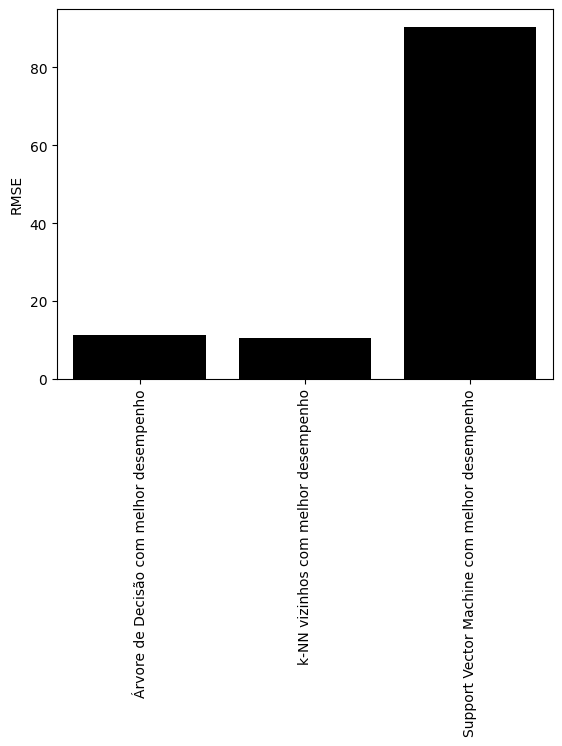

In [53]:
# AQUI VAI GERAR UM GRÁFICO DE BARRA COM TODOS OS RMSES
eixo = sns.barplot(x = ['Árvore de Decisão com melhor desempenho', "k-NN vizinhos com melhor desempenho", "Support Vector Machine com melhor desempenho"], 
                   y = [RMSE_ad, RMSE_knn, RMSE], color = 'black')
eixo.set_ylabel("RMSE");
plt.xticks(rotation= 'vertical')



## CONCLUSÃO:

No desenvolvimento de nosso trabalho, foram realizadas previsões com os modelos de **Árvore de decisão, k-NN vizinhos e Support Vector Machine** acerca do dataset escolhido que explicita as propriedades de materiais supercondutores.

No desenvolvimento de nosso trabalho, aplicamos técnicas de aprendizado de máquina para prever a temperatura crítica de materiais supercondutores, utilizando o conjunto de dados "Superconductivity Data". Diversos modelos foram avaliados, cada um com diferentes capacidades de adaptação a padrões e relações nos dados. **Os resultados revelaram que o método dos K-NN Vizinhos, conhecido pela facilidade de implementação, obteve o menor RMSE, enquanto os modelos de Árvore de Decisão e SVR enfrentaram desafios devido à complexidade dos dados utilizados.

Observamos que os dados apresentam relações complexas entre atributos, e que modelos lineares e de vizinhança próxima, como o k-NN, são mais suscetíveis a erros quando aplicados em cenários com alta não-linearidade e dimensões aumentadas. Nota-se que os dados são extremos demais para modelos mais sofisticados como o SVR, que além de demorar muito para rodar o treino e teste, deu resultados absurdos. Imaginamos que ajustes adicionais nos hiperparâmetros e seleção de variáveis poderiam melhorar a precisão geral.**

Concluímos que, neste contexto, o K-NN é a escolha mais robusta para prever a temperatura crítica dos supercondutores. Esse resultado não só reforça a utilidade e facilidade de implementação do K-NN Vizinhos para esses dados, mas também oferece uma base promissora para avanços futuros, permitindo o refinamento dos modelos para contribuir no desenvolvimento de novos materiais supercondutores.

## REFERÊNCIAS:

[1] CASSAR, Daniel. ATP-203 1.1 - Tratamento de dados

[2] CASSAR, Daniel. ATP-203 2.0 - Tipos de aprendizado de máquina e algoritmo k-NN

[3] CASSAR, Daniel. ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas

[4] CASSAR, Daniel. ATP-203 3.0 - Modelo linear e baseline

[5] CASSAR, Daniel. ATP-203 4.0 - Split de dados de treino e teste

[6] CASSAR, Daniel. ATP-203 4.1 - Árvore de decisão

[7] CASSAR, Daniel. ATP-203 5.0 - Validação cruzada, busca aleatória e busca em grade

[8] CASSAR, Daniel. ATP-203 5.1 - Floresta aleatória

[9] CASSAR, Daniel. ATP-203 6.0 - Desempacotando listas e dicionários com operadores estrela

[10] CASSAR, Daniel. ATP-203 6.1 - Otimização de hiperparâmetros com optuna

[11] CASSAR, Daniel. ATP-203 7.0 - Dados sintéticos e pipeline

[12] CASSAR, Daniel. ATP-203 7.1 - Seleção de atributos

[13] CASSAR, Daniel. ATP-203 7.0 - Dados sintéticos e pipeline

[14] CASSAR, Daniel. ATP-203 8.0 - A matriz de covariância e a matriz de correlação

[15] CASSAR, Daniel. ATP-203 8.1 - Redução de dimensionalidade com PCA

[16] CASSAR, Daniel. ATP-203 9.0 - Tratamento de exceções

[17] CASSAR, Daniel. ATP-203 9.1 - Classificação binária

[18] CASSAR, Daniel. ATP-203 10.0 - Outras métricas de classificação

[19] CASSAR, Daniel. ATP-203 10.1 - Classificação multiclasse

[20] Scikit-Learn. KNeighborsRegressor Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

[21] Scikit-Learn. DecisionTreeRegressor. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

[22] Scikit-Learn. Support Vector Regressor. Disponível em: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html

[23] Optuna. Documentação suporte para o uso do Optuna. Disponível em: https://optuna.readthedocs.io/en/stable/reference/index.html

[24] Dataset Supercondutores. Superconductivty Data. Disponível em: https://archive.ics.uci.edu/dataset/464/superconductivty+data